In [48]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt 

x = sym.Symbol('x', real = True)

def ct(x):
    return sym.sqrt(((x+3)**2) + (2**2)) + (1.33*sym.sqrt(((x-2)**2) + ((-2)**2)))

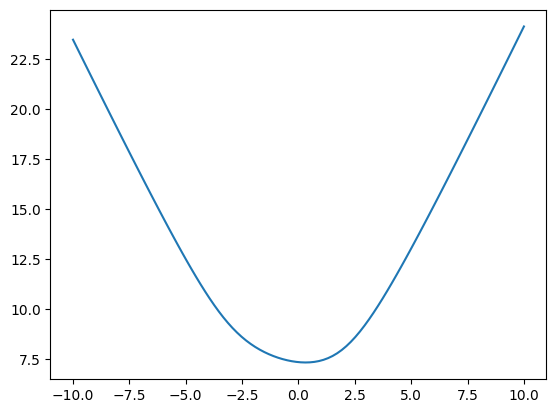

In [49]:
plt.plot(np.linspace(-10, 10, 100), [ct(x).subs(x, i) for i in np.linspace(-10, 10, 100)])

In [50]:
f = lambda y: float(ct(x).subs(x, y))

In [51]:
def Derivative(f,x,h=1e-4):
  return (f(x+h)-f(x-h))/(2*h)
def SDerivative(f,x,h=1e-4):
  return (f(x+h)-2*f(x)+f(x-h))/(h**2)

In [52]:
def GetNewtonMethod(f,xn,itmax=100,precision=1e-8):

  error = 1
  it = 0

  while (error > precision) and (it < itmax):
    try:
      xn1 = xn - Derivative(f,xn)/SDerivative(f,xn)
      error = np.abs(Derivative(f,xn)/SDerivative(f,xn))
    except ZeroDivisionError:
      print('Division by zero error')
    xn = xn1
    it += 1
 # print(it,xn)
  if it == itmax:
    return False
  else:
    return xn

In [55]:
ct(GetNewtonMethod(f, 0))

7.34979567688624

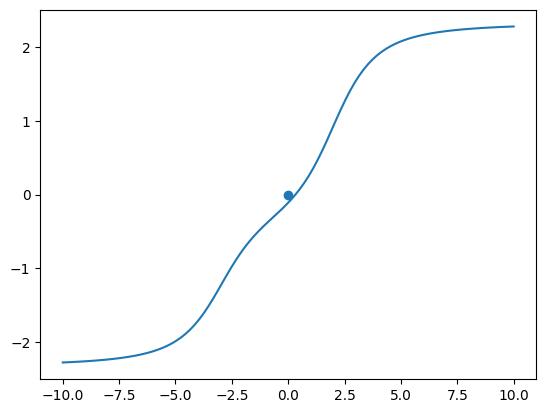

In [54]:
plt.plot(np.linspace(-10, 10, 100), [sym.diff(ct(x), x).subs(x, i) for i in np.linspace(-10, 10, 100)])
plt.scatter(0, 0)
plt.show()